In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn 


In [3]:
## reading file

def read_data(file_name):
    '''
    read data from local drive
    '''
    churn_data = pd.read_csv(file_name, sep=',')
    return churn_data

churn_data = read_data('Churn_Modelling.csv')

churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Making a copy of original data
churn_data_original = churn_data


In [5]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## # removing RowNumber, CustomerId, Surname as they are not useful

In [6]:
churn_data = churn_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [7]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
## churn_data.dtypes

## EDA

Working with object data type 
    1. Geography
    2. Gender

In [10]:
churn_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
survived_class = pd.crosstab(churn_data['Gender'], churn_data['Exited'], margins = True)
print(survived_class)
survived_class.columns = ["Stayed", "Exited","rowtotal"]
survived_class.index= ["Female","Male","coltotal"]
survived_class/survived_class.loc["coltotal"]


Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000


,Stayed,Exited,rowtotal
Female,0.427477,0.559156,0.4543
Male,0.572523,0.440844,0.5457
coltotal,1.000000,1.000000,1.0000


In [12]:
pd.crosstab(index=churn_data['Gender'], columns='Exited')
# Table of survival vs. sex
survived_sex = pd.crosstab(index=churn_data["Gender"], 
                           columns=churn_data["Exited"])

survived_sex.index= ["Gender","Exited"]

survived_sex

Exited,0,1
Gender,3404,1139
Exited,4559,898


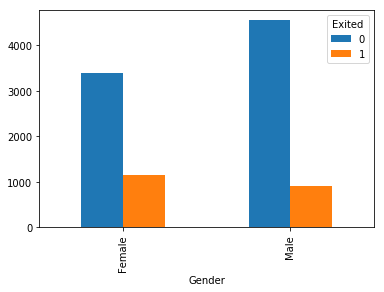

In [13]:
gender_ct = pd.crosstab(churn_data['Gender'], churn_data['Exited'], margins = False)

gender_ct.plot.bar(stacked=False)
plt.legend(title='Exited')

plt.show()


In [14]:
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
pd.crosstab(churn_data['Geography'], churn_data['Exited'], margins = False)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [16]:
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Analysing Integer and Floating values

In [17]:
tenure_eda = churn_data['Tenure'].value_counts().sort_index()
tenure_eda

0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64

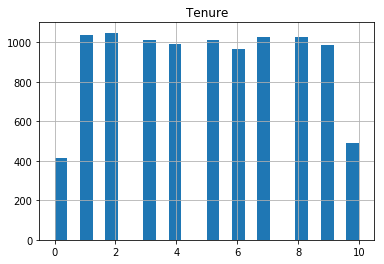

In [18]:
churn_data.hist(column=['Tenure'], bins=24)
plt.show()

### Analysing Age attribute

In [19]:
age_eda = churn_data['Age']
print("min age : " ,min(age_eda))
print("max age : " , max(age_eda))


min age :  18
max age :  92


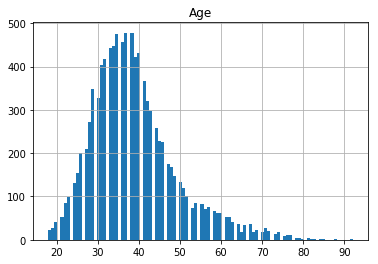

In [20]:
churn_data.hist(column=['Age'], bins=100)
plt.show()

In [21]:
# binning and analysing age attribute againest Exitet (target) attribute
age_ranges = ["[{0} - {1})".format(age, age + 10) for age in range(18, 92, 10)]
age_ranges
count_unique_age_ranges = len(age_ranges)


In [22]:
age  = churn_data['Age']
age_range = pd.cut(x = churn_data["Age"], bins=count_unique_age_ranges, labels=age_ranges)
exited = churn_data['Exited']

frame = {'Age' : age, 'Age_Range' : age_range, 'exited' : exited}
age_df = pd.DataFrame(frame)
age_df.head()

,Age,Age_Range,exited
0,42,[38 - 48),1
1,41,[38 - 48),0
2,42,[38 - 48),1
3,39,[38 - 48),0
4,43,[38 - 48),0


In [23]:
age_df_ct = pd.crosstab(age_df['Age_Range'], age_df['exited'], margins=True)
age_df_ct

exited,0,1,All
Age_Range,,,
[18 - 28),947,73,1020
[28 - 38),3262,327,3589
[38 - 48),2600,680,3280
[48 - 58),648,663,1311
[58 - 68),267,251,518
[68 - 78),169,41,210
[78 - 88),64,1,65
[88 - 98),6,1,7
All,7963,2037,10000


In [24]:
# Drawing Barchart is pending

### Working with CreditScore attribute

In [25]:
creditScore_attribute = churn_data['CreditScore']
print("Min: ", min(creditScore_attribute))
print("Max: ", max(creditScore_attribute))

Min:  350
Max:  850


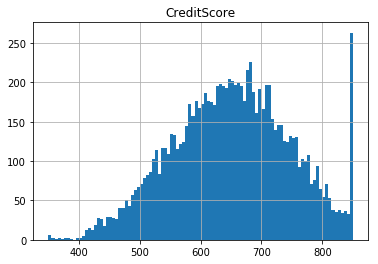

In [26]:
churn_data.hist(column=['CreditScore'], bins=100)
plt.show()

In [27]:
churn_data[churn_data['CreditScore'] ==850].count()

CreditScore        233
Geography          233
Gender             233
Age                233
Tenure             233
Balance            233
NumOfProducts      233
HasCrCard          233
IsActiveMember     233
EstimatedSalary    233
Exited             233
dtype: int64

### Working with Balance attribute

In [28]:
print("min : ", min(churn_data['Balance']))
print("max : ", max(churn_data['Balance']))


min :  0.0
max :  250898.09


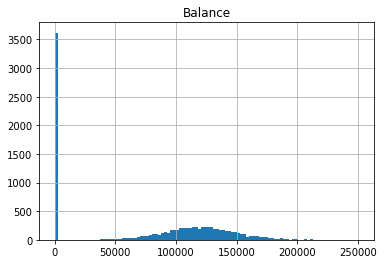

In [29]:
churn_data.hist(column=['Balance'], bins=100)
plt.show()

In [30]:
churn_data[churn_data['Balance'] == 0.0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
dtype: int64

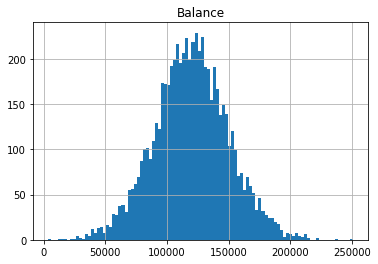

In [31]:
churn_data[churn_data['Balance'] != 0.0].hist(column=['Balance'], bins=100)
plt.show()

### Working with NumOfProducts attribute

In [32]:
churn_data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [33]:
num_prod_ct = pd.crosstab(churn_data['NumOfProducts'], churn_data.Exited, margins=False)
num_prod_ct

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


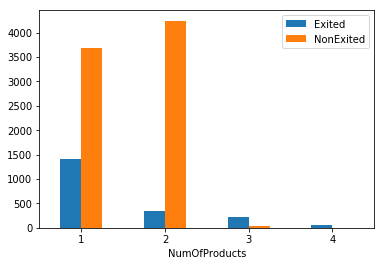

In [34]:
product_df = pd.DataFrame({'Exited': num_prod_ct[1], 'NonExited': num_prod_ct[0]}, index=num_prod_ct.index)
product_df
product_df.plot.bar(rot=0)
plt.show()

intrestingly the people having only one product tend to exit more than people having two and more prodcuts

### Working with HasCrCard attribute

In [35]:
churn_data.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

### Working with IsActiveMember attribute

In [36]:
churn_data.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

### Working with EstimatedSalary attribute

In [37]:
print('min salary', min(churn_data.EstimatedSalary))
print('max salary', max(churn_data.EstimatedSalary))

min salary 11.58
max salary 199992.48


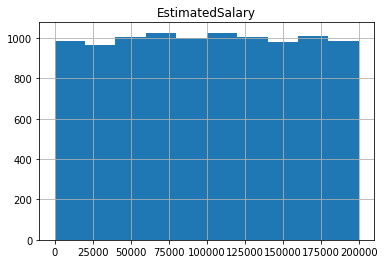

In [38]:
churn_data.hist(column=['EstimatedSalary'])
plt.show()

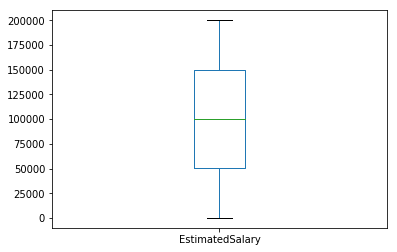

In [39]:
churn_data.EstimatedSalary.plot.box()
plt.show()

# Data Preparation
* prepairing data for the model

In [40]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Working with categorical data
* we can see there are only two categorical attributes
1. Geography and Gender

Applying LabelEncoder for Geography and Gender attributes

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder


print("Unique values for Geography are ", np.unique(np.array(churn_data.Geography)))
print("Unique values for Gender are ",np.unique(np.array(churn_data.Gender)))


Unique values for Geography are  ['France' 'Germany' 'Spain']
Unique values for Gender are  ['Female' 'Male']


In [42]:
label_encoder_Geography = LabelEncoder()
cat_encoded_Geography = label_encoder_Geography.fit(churn_data.Geography)
print("Classes of Geography: ", cat_encoded_Geography.classes_)
churn_data.Geography = cat_encoded_Geography.fit_transform(churn_data.Geography)

print("labels are : ", set(churn_data.NumOfProducts.unique()))

Classes of Geography:  ['France' 'Germany' 'Spain']
labels are :  {1, 2, 3, 4}


C:\Users\Anand\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [43]:
label_encoder_Gender = LabelEncoder()
cat_encoded_Gender = label_encoder_Gender.fit(churn_data.Gender)
print("Classes of Gender: ", cat_encoded_Gender.classes_)
churn_data.Gender = cat_encoded_Gender.fit_transform(churn_data.Gender)

Classes of Gender:  ['Female' 'Male']


C:\Users\Anand\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Applying OneHatEncoding for Geography, Tenure, NumOfProducts

In [44]:
from sklearn.preprocessing import OneHotEncoder
onehat_encoder_data = churn_data[['Geography', 'Tenure', 'NumOfProducts']]

# initiate OneHotEncoder object
onehat_encoder = OneHotEncoder()
# fit OneHotEncoder
onehat_encoder.fit(onehat_encoder_data)
# transform the data

onehot_labels = onehat_encoder.fit_transform(onehat_encoder_data).toarray()

print("Number of elements in each attributes", onehat_encoder.n_values_)

Number of elements in each attributes [ 3 11  5]


In [45]:
onehat_encoder.feature_indices_

array([ 0,  3, 14, 19], dtype=int32)

In [46]:
# renaming the columns
col_names = {'Geography_1', 'Geography_2', 'Geography_3', 'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 
             'Tenure_5', 'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10', 'Tenure_11', 
             'NumOfProd_1', 'NumOfProd_2', 'NumOfProd_3', 'NumOfProd_4'}

onehat_df = pd.DataFrame(data=onehot_labels, columns=col_names)


In [57]:
## adding this onehat encoding dataframe to existing data
churn_data[onehat_df.columns] = onehat_df

In [48]:
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Tenure_1', 'Tenure_11', 'NumOfProd_1', 'Tenure_4',
       'Tenure_2', 'Geography_3', 'Tenure_3', 'Tenure_7', 'Tenure_10',
       'Tenure_9', 'Geography_2', 'Geography_1', 'Tenure_5', 'NumOfProd_2',
       'NumOfProd_3', 'Tenure_6', 'NumOfProd_4', 'Tenure_8'],
      dtype='object')

In [49]:
# preparing y - label data
labels = churn_data.Exited

In [50]:
# removing unecessary attributes
churn_data = churn_data.drop(columns=['Geography', 'Gender', 'Exited', 'NumOfProducts', 'Tenure'])

In [51]:
churn_data.columns

Index(['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Tenure_1', 'Tenure_11', 'NumOfProd_1', 'Tenure_4',
       'Tenure_2', 'Geography_3', 'Tenure_3', 'Tenure_7', 'Tenure_10',
       'Tenure_9', 'Geography_2', 'Geography_1', 'Tenure_5', 'NumOfProd_2',
       'NumOfProd_3', 'Tenure_6', 'NumOfProd_4', 'Tenure_8'],
      dtype='object')

#### Normalizing the attribute

In [52]:
def normalize(data):
  col_max = np.max(data, axis = 0)
  col_min = np.min(data, axis = 0)
  return np.divide(data - col_min, col_max - col_min)  
# X = normalize(churn_data)
churn_data['CreditScore'] = normalize(churn_data['CreditScore'])
churn_data['Age'] = normalize(churn_data['Age'])
churn_data['Balance'] = normalize(churn_data['Balance'])
churn_data['EstimatedSalary'] = normalize(churn_data['EstimatedSalary'])

X = churn_data

#### Splitting training and testing data 

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

## Model Building
* Logistic Regression

In [54]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
clf.score(X_test,y_test)

0.8472727272727273